<a href="https://colab.research.google.com/github/inoueshinji8/PythonStudy/blob/main/quantum_chemistry3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tsujimotter.hatenablog.com/entry/molecular-orbital-visualization
を参考にする<br>
これでPythonでガンガン動かすのは一応最後。ただし、その後の読み物も実に面白い

分子軌道法の変分原理を使う

まずは分かり易く水素分子から！でも、2つになったぞ

2つの波動関数の重ね合わせでc1χ1 + c2χ2とか考える<br>
E真≤E(c1,c2)

これを考えると、c1χ1 + c2χ2のエネルギーが最小になれば良い<br>
でもどうやって求める？

時間に依存するシュレディンガー方程式、では
c1χ1 + c2χ2はシュレディンガー方程式の解になる<br>
ハミルトニアンの線形性のお陰である

そしてエネルギーの期待値は？というと、ハミルトニアンなんだしEとか書いてあるじゃん！<br>
そして確率分布。じゃあ、二乗、じゃなくて複素共役で挟むように掛けて空間積分だ！

ここでハミルトニアンのエルミート演算子の固有値は直交するので違うものでは積はゼロ<br>
一方で波動関数単独だと二乗して空間全体の積分なら規格化されてるから、1だ<br>
これらを利用したら、何かc1およびc2の2乗の比で
エネルギーが求められるぞ！

これであとは直交性とかエルミート性でどんどん潰すというお馴染みのテクニックで

最後に∂E/∂c1 = 0  ∂E/∂c2 = 0<br>
となるc1とc2を求める
そうなるとただの行列式の問題になり、そこで2次方程式を解いて解の大小でエネルギー順位も求まった！<br>

2つの解が出て来るが、大きい方を描くと半結合性軌道、小さい方は結合性軌道

次にエチレンの結合<br>
この時はΠ結合を考える<br>

>π結合とは、σ結合と異なり、結合方向と直角の方向を向いた原子軌道同士の結合のことです。

>p軌道の方向を z 軸とすると、π結合を構成する原子軌道は原子核１の pz 軌道と、原子核２の pz 軌道ということになります。

これも同様に調べる<br>
ただし、一部は実験で調べる。あるいはヒュッケル法

In [ ]:
# 記事の一番最後に完全版のプログラムを掲載します。
# エチレン分子のπ_2p軌道
def ethylene_molecule(x, y, z, id):
    Z = 6        # 炭素原子を想定しているので Z = 6
    Z_eff = Z - (0.35*3 + 0.85*2)  # 有効核電荷（スレータ―則により計算）
    n = 2
    l = 1
    m = 0
    distance = 133.9/52.9  # 水素原子のボーア半径 52.9 pm, エチレン分子の原子間距離 133.9 pm
    if id == 0:
        # π_2p軌道（結合性軌道）
        return (f(x-distance/2, y, z, n, l, m, Z_eff)/np.sqrt(2.0)) + (f(x+distance/2, y, z, n, l, m, Z_eff)/np.sqrt(2.0)) 
    else:
        # π_2p*軌道（反結合性軌道）
        return (f(x-distance/2, y, z, n, l, m, Z_eff)/np.sqrt(2.0)) - (f(x+distance/2, y, z, n, l, m, Z_eff)/np.sqrt(2.0)) 

>水素分子のときと同じように、原子軌道（pz軌道）のエネルギーに対して、上下に２つの軌道が生まれます。エネルギーの低い方が結合性軌道で、高い方が反結合性軌道です。

>また、S12=0と近似したことによって、エネルギーが E1=α+β,E2=α−β と対称的になったことが重要なポイントです。（α を中心に、±|β|だけ上下しています。）

>エチレンの場合は、炭素原子の pz軌道電子が各1つずつ分子軌道に入るわけですが、2個なのでどちらも結合性軌道に入ります。どちらも結合性軌道に入るということで、安定した結合が形成されるようです。

ヒュッケル法とブタジエンのπ電子共役系

>（ブタジエンのように）二重結合・単結合が交互に並んだ結合において、π電子が非局在化しているような系を一般に π電子共役系 といいます。

今回も線形結合
Ψ=c1χ1+c2χ2+c3χ3+c4χ4を考える

>そこで思い切った近似が必要になります。ここで使えるのが ヒュッケル法 です。

>まず、ヒュッケル法はブタジエンのような π電子共役系 で適用できる近似手法です。このような状況で、近似を行います：

例によって同じ添え字の時に1、違うなら0とか<br>
あるいはハミルトニアンを共役で挟んでるなら、同じ添え字ならα、違う添え字でもσ結合ならβ、どちらでも無いなら0

永年方程式　って大事だな

とにかくあまりにも離れてて無関係な行列間の要素は、0とみなす！という意味である



In [ ]:
# 記事の一番最後に完全版のプログラムを掲載します。
# ブタジエンのπ電子共役系
# http://www.nishino-labo.jp/pdf/enshu01_03_2012.pdf （原子間距離の参考）
def butadiene_molecule(x, y, z, id):
    Z = 6        # 炭素原子を想定しているので Z = 6
    Z_eff = Z - (0.35*3 + 0.85*2)  # 有効核電荷（スレータ―則により計算）
    n = 2
    l = 1
    m = 0
    distance_1 = 147.0/52.9  # 水素原子のボーア半径 52.9 pm, C2-C3の原子間距離 147.0 pm
    distance_2 = 134.0/52.9  # 水素原子のボーア半径 52.9 pm, C1-C2, C3-C4の原子間距離 134.0 pm
    
    # 各炭素原子の中心座標
    center = [
        [0.5 * distance_1 * np.cos(7.0*np.pi/6.0), 0.5 * distance_1 * np.sin(7.0*np.pi/6.0) - distance_2],
        [0.5 * distance_1 * np.cos(7.0*np.pi/6.0), 0.5 * distance_1 * np.sin(7.0*np.pi/6.0)],
        [0.5 * distance_1 * np.cos(np.pi/6.0), 0.5 * distance_1 * np.sin(np.pi/6.0)],
        [0.5 * distance_1 * np.cos(np.pi/6.0), 0.5 * distance_1 * np.sin(np.pi/6.0) + distance_2],
    ]
    
    # 係数
    c = [
        [0.372, 0.602, 0.602, 0.372],
        [0.602, 0.372, -0.372, -0.602],
        [0.602, -0.372, -0.372, 0.602],
        [-0.372, 0.602, -0.602, 0.372],
    ]
    
    res = 0.0
    for i in range(4):
        x0 = x - center[i][0]
        y0 = y - center[i][1]
        res += f(x0, y0, z, n, l, m, Z_eff) * c[id][i]

#でもこれらを解く前の過程で、やっぱり二重結合の方が近いかな？とかのセンス必須

エネルギー順位が4つできたが、

>電子によって占有されている最もエネルギーが高い軌道のことを HOMO（Highest Occupied Molecular Orbital） といい、電子が空であるような最もエネルギーが低い軌道のことを LUMO（Lowest Unoccupied Molecular Orbital） といいます。

>光の吸収 という観点でもHOMO-LUMOを考えるのは重要です。

>日曜化学(1)の記事では、こんなことを書いていました。水素原子に振動数 ν
の光が入ってきたとき、電子がより高いエネルギーの軌道（励起状態）に遷移することがあります。遷移する条件はエネルギー差が hνにちょうど一致することです。これは分子軌道でも同じことです。

>すなわち、ちょうどエネルギー差が ΔE=E3−E2
に一致する光が入射すると、HOMOの電子が光を吸収してLUMOに励起するというわけです。

>エチレン（二重結合１つ）とブタジエン（二重結合２つ）を考えましたが、同じ要領で二重結合／単結合のセットを増やしていくと、分子軌道の数が 2,4,6,8,… と増えていきます。

>図の右に行けば行くほど、HOMOとLOMOの間のエネルギー差はどんどん小さくなっていきます。よりエネルギーの小さい（つまり、長い波長）の光を吸収するようになるということに他なりません。

>こんな風に、分子軌道のエネルギーというのは、吸収する光の波長と大変関係が深い ということですね。吸収する光の波長が可視光であれば、物質の色にも影響を与えることになります。

>たとえば、β-カロテン という物質を考えましょう。ニンジンの中に入っている橙色の色素成分です。これはβ-カロテンの分子が補色である青色の光を吸収するからなのですが、この青色を吸収する仕組みが分子軌道からわかるのです。

>β-カロテンの分子は、以下のような構造をしています：

>二重結合が全部で11個 あります。ブタジエンの議論の延長で、炭素22個によるπ電子共有系を考えると

>エチレンのHOMO-LUMO間のエネルギー差の 1/7以下です。より低い振動数の（つまり長波長の）光を吸収できるようになるというわけですね。これによって可視光の波長を吸収することができるようになるわけです。

>こんな風に分子軌道法によって、我々が見ているものの「色」を分子軌道から説明できる可能性があるのです。これは面白くてたまらないですね！

ベンゼンのπ共有系

Ψ=c1χ1+c2χ2+c3χ3+c4χ4+c5χ5+c6χ6
で、ヒュッケル法を考えるがやっぱり最後は繋がっているので行列の端にも非ゼロ要素が来る

Sagemath　というアプリで6×6行列式を計算する

各固有値に対応する６つの分子軌道が次のように得られるが、完全に綺麗な対称性でも無いように見えるが、気にしない！

In [ ]:
# 記事の一番最後に完全版のプログラムを掲載します。
# ベンゼン分子のπ電子共役系
def benzene_molecule(x, y, z, id):
    Z = 6        # 炭素原子を想定しているので Z = 6
    Z_eff = Z - (0.35*3 + 0.85*2)  # 有効核電荷（スレータ―則により計算）
    n = 2
    l = 1
    m = 0
    distance = 139/52.9  # 水素原子のボーア半径 52.9 pm, ベンゼン分子の炭素間距離 139 pm
    
    # 各炭素原子の中心座標
    center = []
    for i in range(6):
        cx = distance * np.sin(2*i*np.pi/6)
        cy = distance * np.cos(2*i*np.pi/6)
        center.append([cx,cy])
    
    # 係数
    c = [
        [1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6)],
        [1/np.sqrt(3), 1/(2.0*np.sqrt(3)), -1/(2.0*np.sqrt(3)), -1/np.sqrt(3), -1/(2.0*np.sqrt(3)), 1/(2.0*np.sqrt(3))],
        [0.0, 1/2.0, 1/2.0, 0.0, -1/2.0, -1/2.0],
        [1/np.sqrt(3), -1/(2.0*np.sqrt(3)), -1/(2.0*np.sqrt(3)), 1/np.sqrt(3), -1/(2.0*np.sqrt(3)), -1/(2.0*np.sqrt(3))],
        [0.0, 1/2.0, -1/2.0, 0.0, 1/2.0, -1/2.0],
        [1/np.sqrt(6), -1/np.sqrt(6), 1/np.sqrt(6), -1/np.sqrt(6), 1/np.sqrt(6), -1/np.sqrt(6)],
    ]
    
    res = 0.0
    for i in range(6):
        x0 = x - center[i][0]
        y0 = y - center[i][1]
        res += f(x0, y0, z, n, l, m, Z_eff) * c[id][i]
    
    return res

In [1]:
# 「90%サンプリング」による分子軌道の可視化
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

import math

In [2]:
# 動径波動関数（ボーア半径を a_0 = 1 に正規化）
def radial_wave_function(r, n, l, Z_eff):
    rho = 2.0 * Z_eff * r / n
    if n == 1 and l == 0:
        return (Z_eff ** 1.5) * np.exp(-rho/2.0) * 2.0
    elif n == 2 and l == 0:
        return (Z_eff ** 1.5) * np.exp(-rho/2.0) * (2.0 - rho) / (2.0*np.sqrt(2.0))
    elif n == 2 and l == 1:
        return (Z_eff ** 1.5) * np.exp(-rho/2.0) * rho / (2.0*np.sqrt(6.0))
    elif n == 3 and l == 0:
        return (Z_eff ** 1.5) * np.exp(-rho/2.0) * (6.0 - 6.0*rho + rho**2) / (9.0*np.sqrt(3.0))
    elif n == 3 and l == 1:
        return (Z_eff ** 1.5) * np.exp(-rho/2.0) * (4.0 - rho) * rho / (9.0*np.sqrt(6.0))
    elif n == 3 and l == 2:
        return (Z_eff ** 1.5) * np.exp(-rho/2.0) * (rho**2) / (9.0*np.sqrt(30.0))

In [3]:
# 球面調和関数（ただし、実関数表示したもの）
def spherical_harmonics(theta, phi, l, m):
    if l == 0:
        if m == 0:
            # l=0, m=0
            return np.sqrt(1.0/(4*np.pi))
    if l == 1:
        if m == 0:
            # l=1, m=0
            return np.sqrt(3.0/(4.0*np.pi)) * np.cos(theta)
        if m == 1:
            # l=1, m=+1
            return np.sqrt(3.0/(4.0*np.pi)) * np.sin(theta) * np.cos(phi)
        if m == -1:
            # l=1, m=+1
            return np.sqrt(3.0/(4.0*np.pi)) * np.sin(theta) * np.sin(phi)
    if l == 2:
        if m == 0:
            return np.sqrt(5.0/(16.0*np.pi)) * (3.0*(np.cos(theta)**2) - 1.0)
        if m == 1:
            return np.sqrt(15.0/(4.0*np.pi)) * np.cos(theta) * np.sin(theta) * np.cos(phi)
        if m == -1:
            return np.sqrt(15.0/(4.0*np.pi)) * np.cos(theta) * np.sin(theta) * np.sin(phi)
        if m == 2:
            return np.sqrt(15.0/(16.0*np.pi)) * (np.sin(theta)**2) * np.cos(2*phi)
        if m == -2:
            return np.sqrt(15.0/(16.0*np.pi)) * (np.sin(theta)**2) * np.sin(2*phi)

In [4]:
# 水素原子の波動関数 Ψ_{n,l,m}(x, y, z)
def f(x, y, z, n, l, m, Z_eff):
    # 座標系を (x,y,z) -> (r,θ,φ) に変換
    r = np.sqrt(x*x + y*y + z*z)
    
    theta = 0.0
    phi = 0.0
    if r > 0:
        theta = np.arccos( z / r )
    if y == 0:
        if x < 0:
            phi = np.pi
    elif x*x+y*y > 0:
        phi = np.sign(y) * np.arccos(x/np.sqrt(x*x+y*y))
        
    # 動径波動関数と球面調和関数の積を計算して出力
    return (radial_wave_function(r, n, l, Z_eff) * spherical_harmonics(theta, phi, l, m))

In [5]:
# 水素分子のσ_1s軌道
def hydrogen_molecule(x, y, z, id):
    Z = 1        # 炭素原子を想定しているので Z = 1
    n = 1
    l = 0
    m = 0
    distance = 2.0  # 水素分子の原子核間距離
    if id == 0:
        # σ_1s軌道（結合性軌道）
        return (f(x-distance/2, y, z, n, l, m, Z)/np.sqrt(3.2)) + (f(x+distance/2, y, z, n, l, m, Z)/np.sqrt(3.2))
    else:
        # σ_1s*軌道（反結合性軌道）
        return (f(x-distance/2, y, z, n, l, m, Z)/np.sqrt(0.8)) - (f(x+distance/2, y, z, n, l, m, Z)/np.sqrt(0.8))

In [6]:
# エチレン分子のπ_2p軌道
def ethylene_molecule(x, y, z, id):
    Z = 6        # 炭素原子を想定しているので Z = 6
    Z_eff = Z - (0.35*3 + 0.85*2)  # 有効核電荷（スレータ―則により計算）
    n = 2
    l = 1
    m = 0
    distance = 133.9/52.9  # 水素原子のボーア半径 52.9 pm, エチレン分子の原子間距離 133.9 pm
    if id == 0:
        # π_2p軌道（結合性軌道）
        return (f(x-distance/2, y, z, n, l, m, Z_eff)/np.sqrt(2.0)) + (f(x+distance/2, y, z, n, l, m, Z_eff)/np.sqrt(2.0)) 
    else:
        # π_2p*軌道（反結合性軌道）
        return (f(x-distance/2, y, z, n, l, m, Z_eff)/np.sqrt(2.0)) - (f(x+distance/2, y, z, n, l, m, Z_eff)/np.sqrt(2.0))

In [7]:
# ブタジエンのπ電子共役系
# http://www.nishino-labo.jp/pdf/enshu01_03_2012.pdf （原子間距離の参考）
def butadiene_molecule(x, y, z, id):
    Z = 6        # 炭素原子を想定しているので Z = 6
    Z_eff = Z - (0.35*3 + 0.85*2)  # 有効核電荷（スレータ―則により計算）
    n = 2
    l = 1
    m = 0
    distance_1 = 147.0/52.9  # 水素原子のボーア半径 52.9 pm, C2-C3の原子間距離 147.0 pm
    distance_2 = 134.0/52.9  # 水素原子のボーア半径 52.9 pm, C1-C2, C3-C4の原子間距離 134.0 pm
    
    # 各炭素原子の中心座標
    center = [
        [0.5 * distance_1 * np.cos(7.0*np.pi/6.0), 0.5 * distance_1 * np.sin(7.0*np.pi/6.0) - distance_2],
        [0.5 * distance_1 * np.cos(7.0*np.pi/6.0), 0.5 * distance_1 * np.sin(7.0*np.pi/6.0)],
        [0.5 * distance_1 * np.cos(np.pi/6.0), 0.5 * distance_1 * np.sin(np.pi/6.0)],
        [0.5 * distance_1 * np.cos(np.pi/6.0), 0.5 * distance_1 * np.sin(np.pi/6.0) + distance_2],
    ]
    
    # 係数
    c = [
        [0.372, 0.602, 0.602, 0.372],
        [0.602, 0.372, -0.372, -0.602],
        [0.602, -0.372, -0.372, 0.602],
        [-0.372, 0.602, -0.602, 0.372],
    ]
    
    res = 0.0
    for i in range(4):
        x0 = x - center[i][0]
        y0 = y - center[i][1]
        res += f(x0, y0, z, n, l, m, Z_eff) * c[id][i]
        
    return res

In [8]:
# ベンゼン分子のπ電子共役系
def benzene_molecule(x, y, z, id):
    Z = 6        # 炭素原子を想定しているので Z = 6
    Z_eff = Z - (0.35*3 + 0.85*2)  # 有効核電荷（スレータ―則により計算）
    n = 2
    l = 1
    m = 0
    distance = 139/52.9  # 水素原子のボーア半径 52.9 pm, ベンゼン分子の炭素間距離 139 pm
    
    # 各炭素原子の中心座標
    center = []
    for i in range(6):
        cx = distance * np.sin(2*i*np.pi/6)
        cy = distance * np.cos(2*i*np.pi/6)
        center.append([cx,cy])
    
    # 係数
    c = [
        [1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6), 1/np.sqrt(6)],
        [1/np.sqrt(3), 1/(2.0*np.sqrt(3)), -1/(2.0*np.sqrt(3)), -1/np.sqrt(3), -1/(2.0*np.sqrt(3)), 1/(2.0*np.sqrt(3))],
        [0.0, 1/2.0, 1/2.0, 0.0, -1/2.0, -1/2.0],
        [1/np.sqrt(3), -1/(2.0*np.sqrt(3)), -1/(2.0*np.sqrt(3)), 1/np.sqrt(3), -1/(2.0*np.sqrt(3)), -1/(2.0*np.sqrt(3))],
        [0.0, 1/2.0, -1/2.0, 0.0, 1/2.0, -1/2.0],
        [1/np.sqrt(6), -1/np.sqrt(6), 1/np.sqrt(6), -1/np.sqrt(6), 1/np.sqrt(6), -1/np.sqrt(6)],
    ]
    
    res = 0.0
    for i in range(6):
        x0 = x - center[i][0]
        y0 = y - center[i][1]
        res += f(x0, y0, z, n, l, m, Z_eff) * c[id][i]
    
    return res


In [9]:
# サンプリングの設定
N = 50                    # サンプリング個数
x_range = 5               # 座標の範囲 (-x_range, x_range)
delta = 2.0*x_range / N   # サンプリング間隔
#print(delta)


# 3次元空間を格子状にサンプリング（間隔 delta, N^3 個）
data_list = []
for i in range(N):
    for j in range(N):
        for k in range(N):
            x = i*delta - x_range
            y = j*delta - x_range
            z = k*delta - x_range
            
            # 座標 (x,y,z) における波動関数 Ψ(x,y,z) を計算
            # psi = hydrogen_molecule(x,y,z, 0)   # id = 0 or 1
            # psi = ethylene_molecule(x,y,z, 1)   # id = 0 or 1
            # psi = butadiene_molecule(x,y,z, 0)   # id = 0, 1, 2, 3
            psi = benzene_molecule(x,y,z, 0)   # id = 0, 1, 2, 3, 4, 5

            #プログラム内の次の箇所を変えると（コメントアウトを変更すると）、表示する分子軌道の種類を変えることができます。（デフォルトはベンゼンの Ψ1 軌道。）
            
            # 波動関数の2乗によって電子の確率密度関数 |Ψ(x,y,z)|^2 を計算
            pdf = psi**2
            
            # 確率密度(|Ψ(x,y,z)|^2, p.d.f), x, y, z, 波動関数の生の値 Ψ(x,y,z) の順にデータを格納
            data_list.append([pdf, x, y, z, psi])

In [10]:
# 確率密度が高い順にサンプリングデータをソートする
sorted_list = sorted(data_list, key=lambda data: data[0], reverse=True)  # 確率密度(p.d.f)でソート



# 波動関数が正のデータを格納する変数
x1_list = []
y1_list = []
z1_list = []

# 波動関数が負のデータを格納する変数
x2_list = []
y2_list = []
z2_list = []


In [11]:
# 現在考えている全体の空間（体積: (x_range)^3）における積分値を計算しておく（あとで使う）
def integral_in_all_spaces():
    integral = 0.0
    i = 0
    while i < len(sorted_list):
        pdf = sorted_list[i][0]
        psi = sorted_list[i][4]

        # |Ψ(x,y,z)|^2 ΔV を加算
        integral += (pdf * delta**3)
        i += 1
    print("グリッド数: {}, 全空間の積分: {}".format(i, integral) )  
    return integral

In [12]:
all_integral = integral_in_all_spaces()

グリッド数: 125000, 全空間の積分: 1.5794959747656376


In [13]:
# |Ψ|^2 ΔV の総和( volume )が 0.9 を超えるまで足し合わせる（体積が0.9を超えたら終了）
integral = 0.0
i = 0
while integral < 0.9 * all_integral: # 全空間の積分値に対して 90 % になる領域を描画するように変更
    pdf = sorted_list[i][0]
    x = sorted_list[i][1]
    y = sorted_list[i][2]
    z = sorted_list[i][3]
    psi = sorted_list[i][4]
    
    # |Ψ(x,y,z)|^2 ΔV を加算
    integral += (pdf * delta**3)
    
    if psi > 0:
        x1_list.append(x)
        y1_list.append(y)
        z1_list.append(z)
    else:
        x2_list.append(x)
        y2_list.append(y)
        z2_list.append(z)   
    i += 1


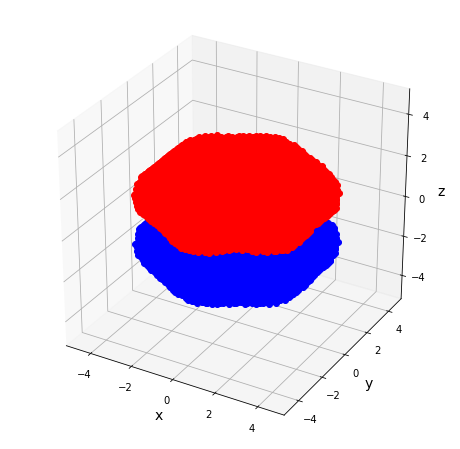

In [14]:
# figureを生成する
X1 = np.array(x1_list)
Y1 = np.array(y1_list)
Z1 = np.array(z1_list)

X2 = np.array(x2_list)
Y2 = np.array(y2_list)
Z2 = np.array(z2_list)



#'''
# matplotlibによる可視化
fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.set_xlim3d(-x_range, x_range)
ax.set_ylim3d(-x_range, x_range)
ax.set_zlim3d(-x_range, x_range)

# 軸の設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("y", size = 14)
ax.set_zlabel("z", size = 14)

ax.plot(X2,Y2,Z2,color='b',marker="o",linestyle='None')
ax.plot(X1,Y1,Z1,color='r',marker="o",linestyle='None')

plt.show()